# Plotting prophet uncertainties
Looking at the uncertainties to see if they change with seasonality, etc.

In [6]:
# import some stuff
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [22]:
# use LA apples as a case study since they have well-defined seasonality. 
data_to_use = './LOS+ANGELES_LEMONS_prophet_output.csv'

In [23]:
# read in data
produce_modeled_data = pd.read_csv(data_to_use)
produce_modeled_data.head()

,ds,yhat,yhat_lower,yhat_upper,y
0,2007-06-01,33.993383,29.769012,38.137562,35.563320
1,2007-06-04,34.572567,30.478827,38.556785,35.843685
2,2007-06-05,34.770790,31.016658,38.936506,35.843685
3,2007-06-06,34.967337,30.711227,39.284970,35.843685
4,2007-06-07,35.159778,31.256485,39.093320,35.843685


In [24]:
# subtract the model fit from the upper error
detrended_error = produce_modeled_data['yhat_upper'] - produce_modeled_data['yhat']

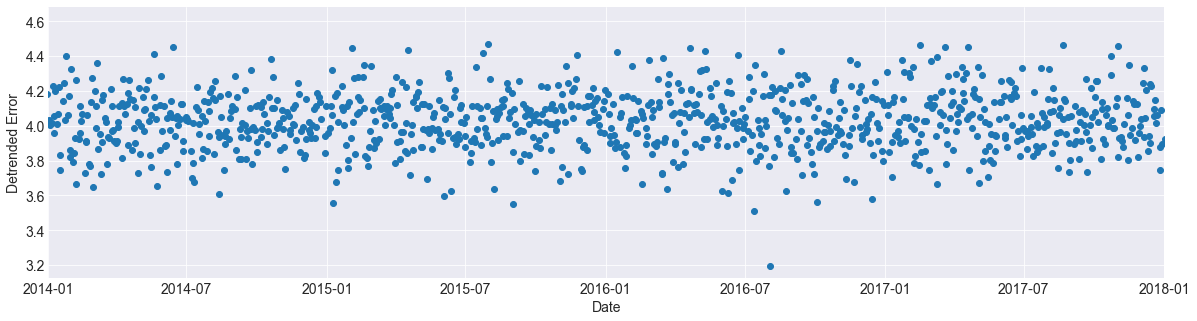

In [27]:
# now plot the detrended error as a function of time
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.figure(figsize=(20,5))

plt.plot_date(pd.to_datetime(produce_modeled_data['ds']), detrended_error)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Detrended Error', fontsize=14)

plt.xlim(['2014', '2018'])

plt.show()

#plt.savefig(title+'_'+city+'_pctmiss.pdf', format='pdf', bbox_inches='tight')